Exploratory Data Analysis (EDA) on wine datasets

In [1]:
import opendatasets as od 
od.download("https://www.kaggle.com/datasets/rajyellow46/wine-quality")

Skipping, found downloaded files in "./wine-quality" (use force=True to force download)


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("wine-quality/winequalityN.csv")

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Basic Dataset Interpretation

In [5]:
print(df.info())
print(df.shape)
print(df.columns.to_list())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
(6497, 13)
['type', 'fixed acidity', 'volatile acidity', '

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

type: 2
fixed acidity: 106
volatile acidity: 187
citric acid: 89
residual sugar: 316
chlorides: 214
free sulfur dioxide: 135
total sulfur dioxide: 276
density: 998
pH: 108
sulphates: 111
alcohol: 111
quality: 7


We can observe that the dataset contains of 6497 rows and 13 feature columns. Each row represents the wine sample and each feature columns represents the chemical property of the wine. Most of the columns are numerical with dtype float except the type which is categorical  with dtype object and quality which is also a target feature is a ordinal column  with dtype inthigher the value higher the quality of the wine. 

Sanity Check

In [7]:
print(df.isnull().sum())


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [8]:
df.duplicated().sum()


np.int64(1168)

After the sanity check we can obeserve that there are some null values on columns fixed acidity, vloatile acidity, citric acid, residual sugar, chlorides, pH and suphates but they are very small in number so we can reimply drop them or we can impute them using mean or median as these are numerical columns if oultiers are heavy in col we use median else mean.


We can also see the significant amount of duplicates value in the datasets which should be droped

Univariate Analysis

In [9]:
cat_col = df['type']
target_col = df['quality']  
num_cols = df.drop(columns=['type', 'quality'])

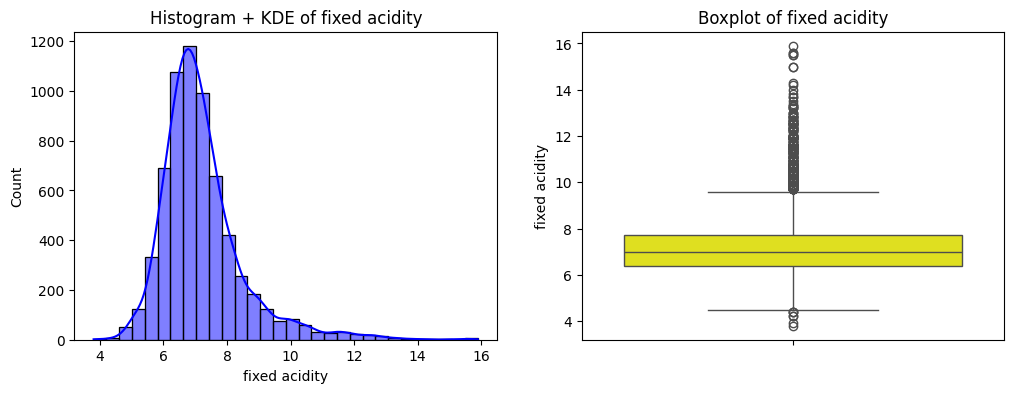

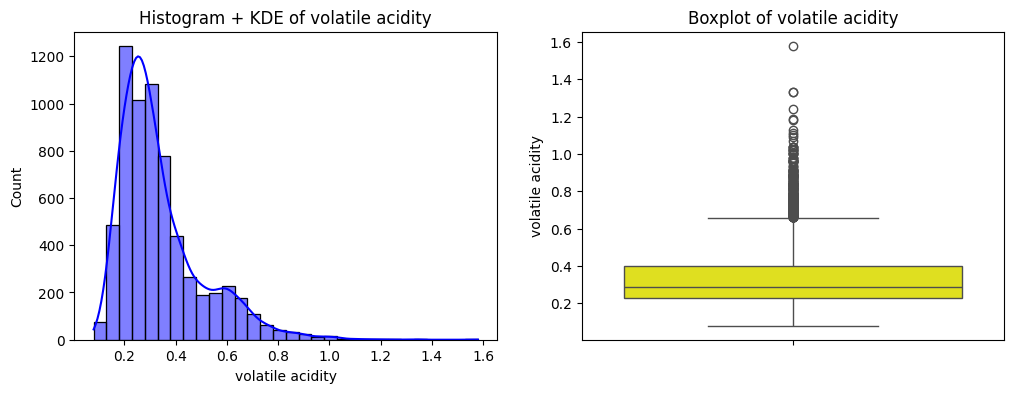

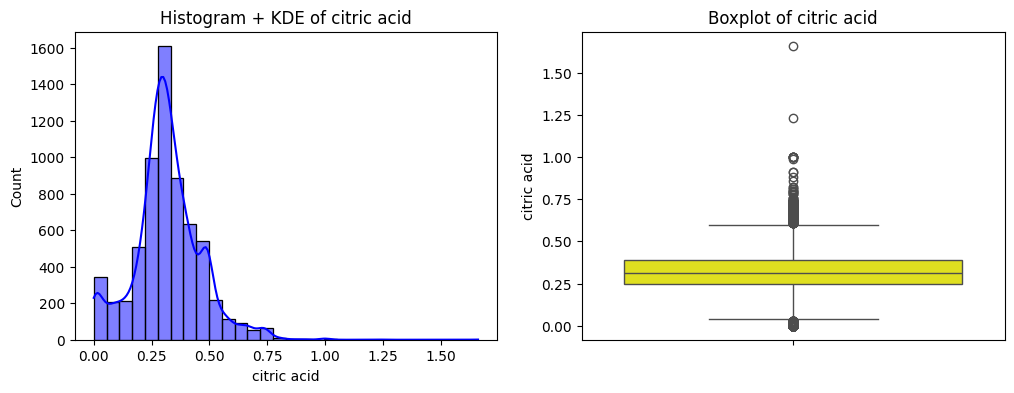

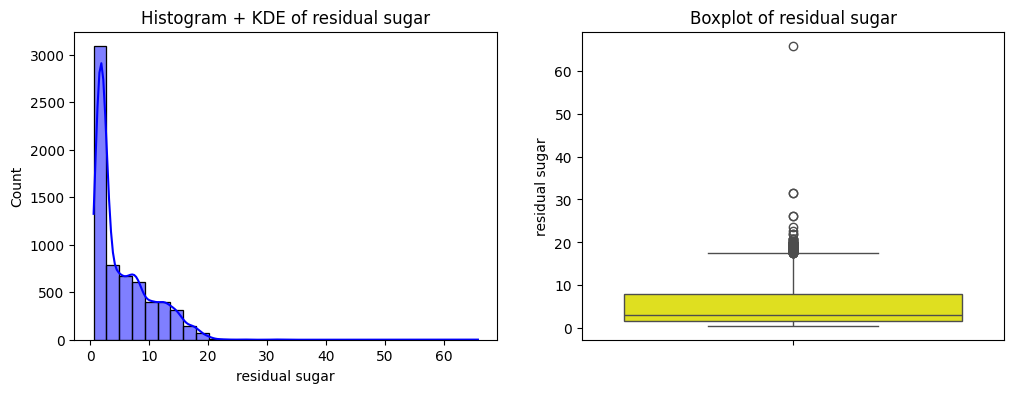

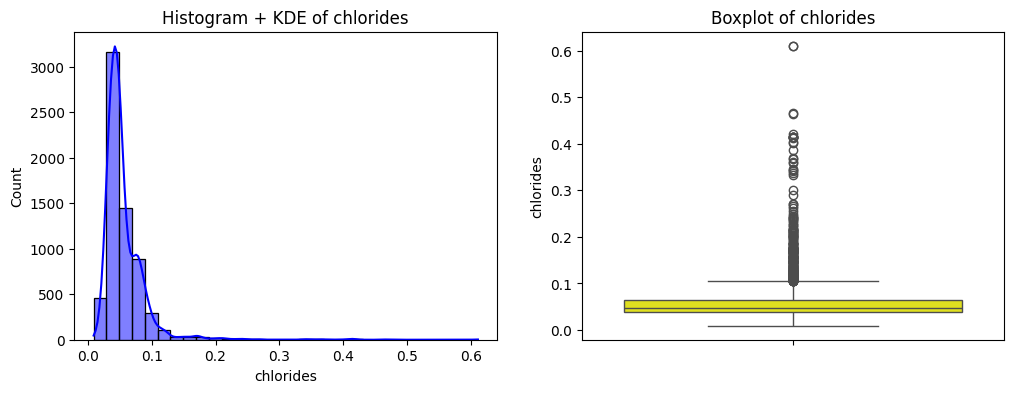

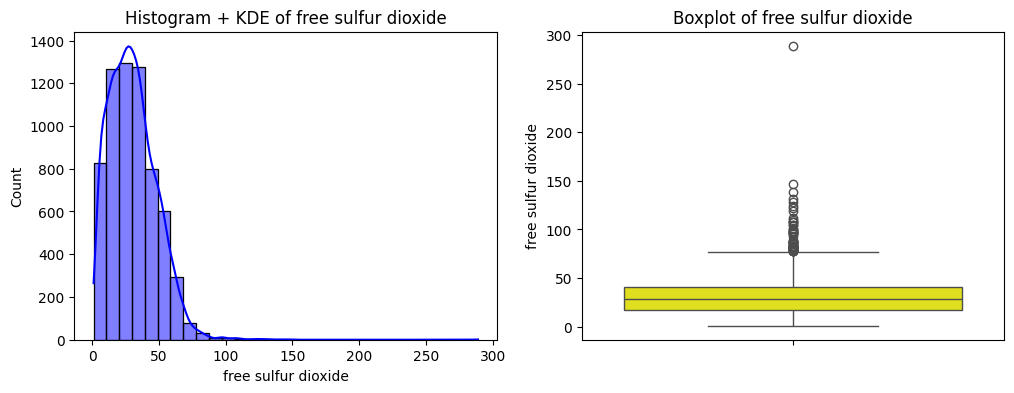

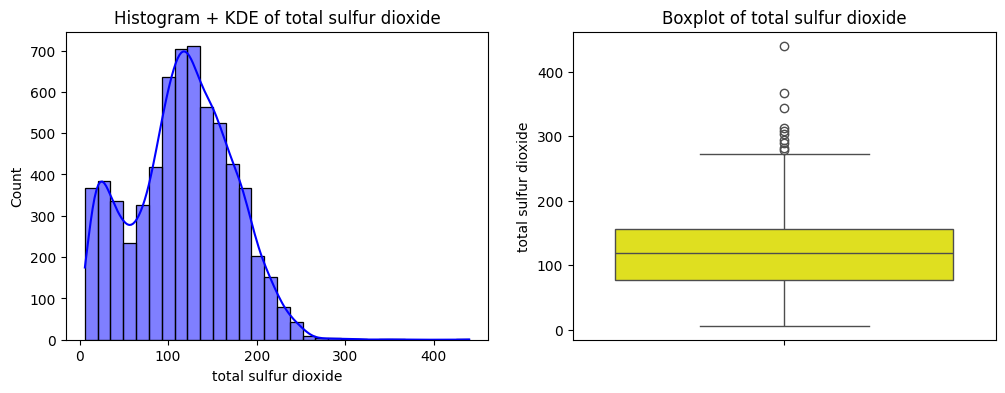

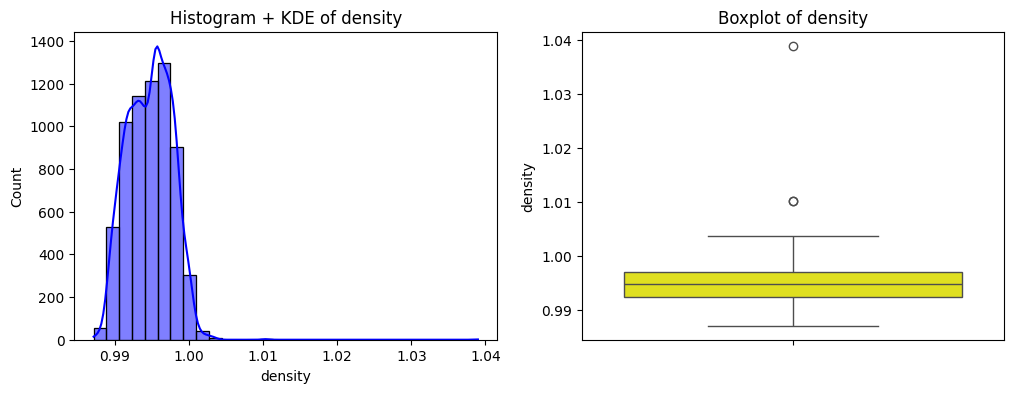

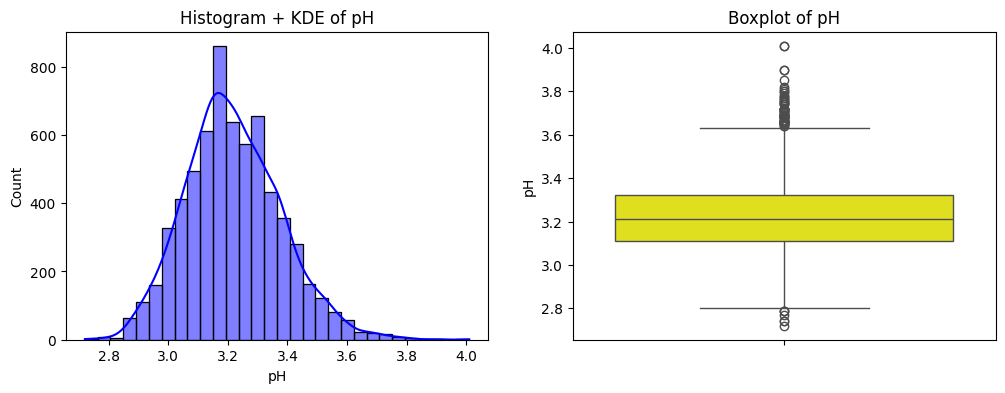

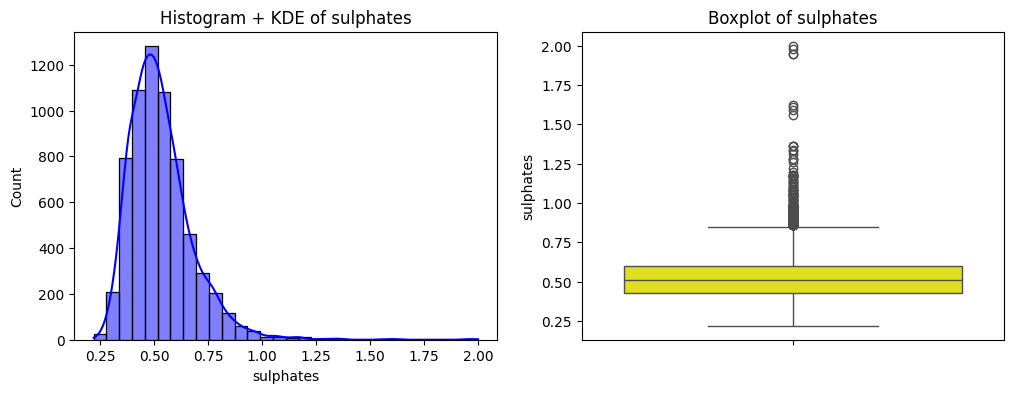

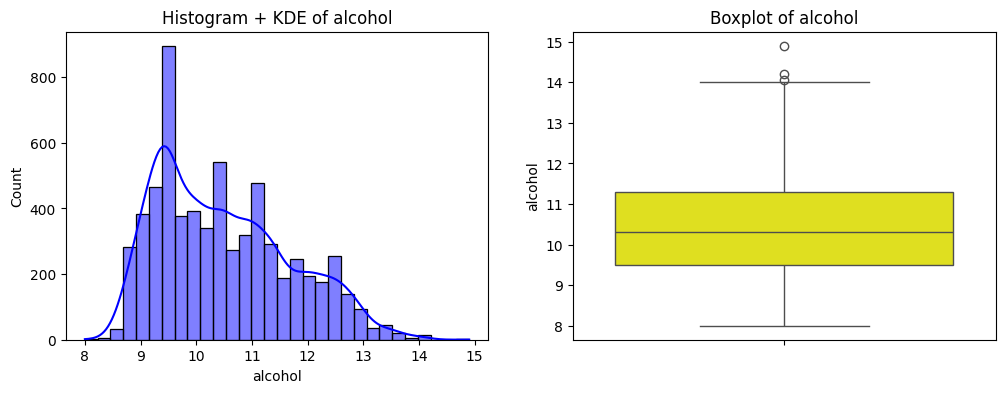

In [10]:
#Histogram + KDE  and Boxplot for the numerical features

for col in num_cols:
    fig,axs = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(num_cols[col], kde=True, color='blue', bins=30, ax=axs[0])
    axs[0].set_title(f'Histogram + KDE of {col}')
    sns.boxplot(num_cols[col], color = "yellow", ax = axs[1])
    axs[1].set_title(f'Boxplot of {col}')
    plt.show()  

we can observe that most of the data are right tailed or right skewed which means most of the data are concentrated on left side  where mean > medain except the ph column which is almost in perfect normal distibution where mean median and mode all lies at center and are same. On observing the box plot we can see the the significant amount of oultiers in many columns which means during imputation of missing values median will be the good choice than that of mean

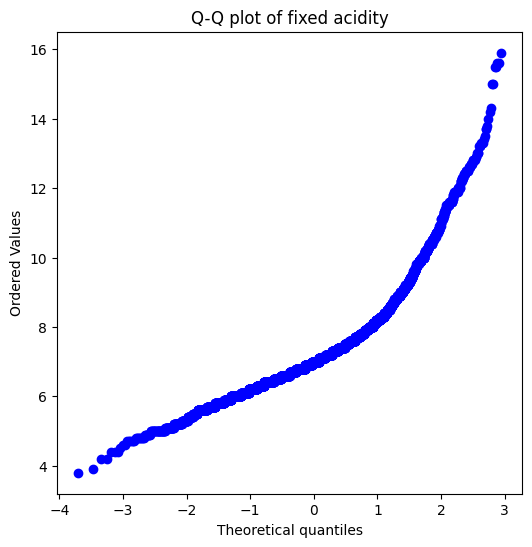

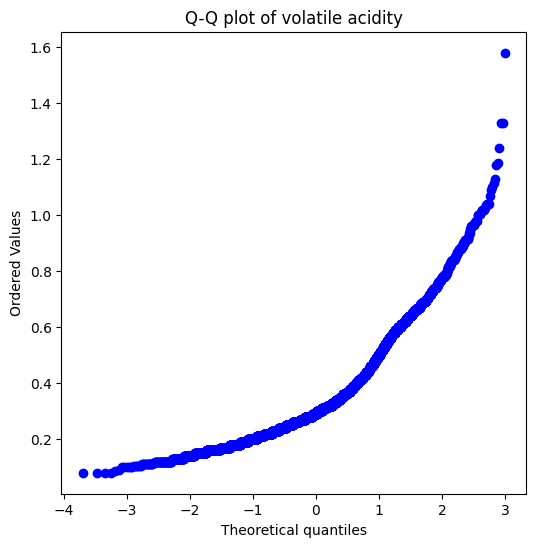

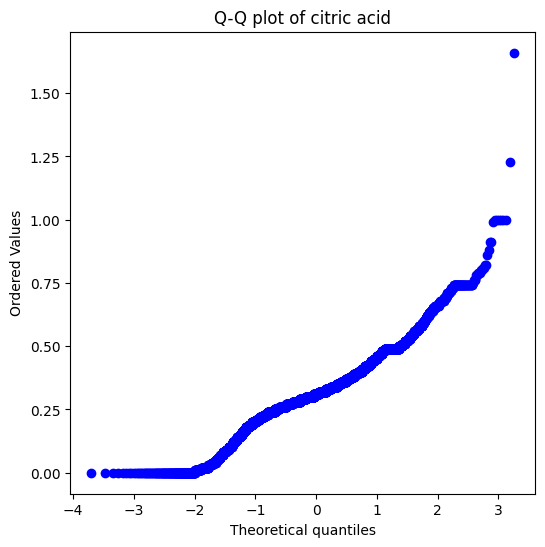

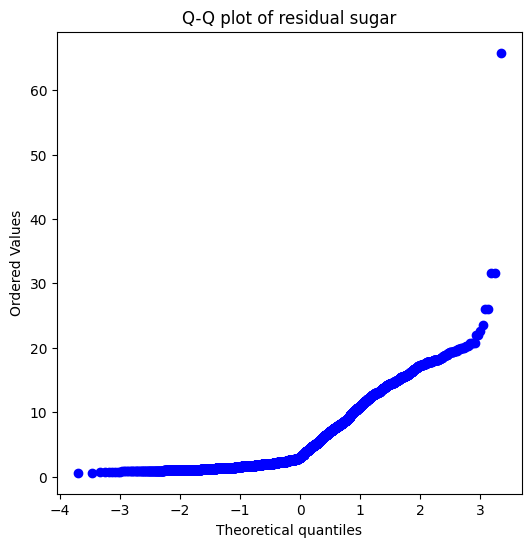

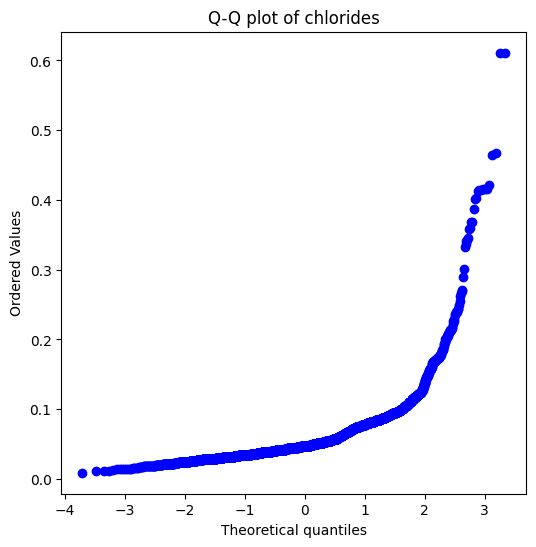

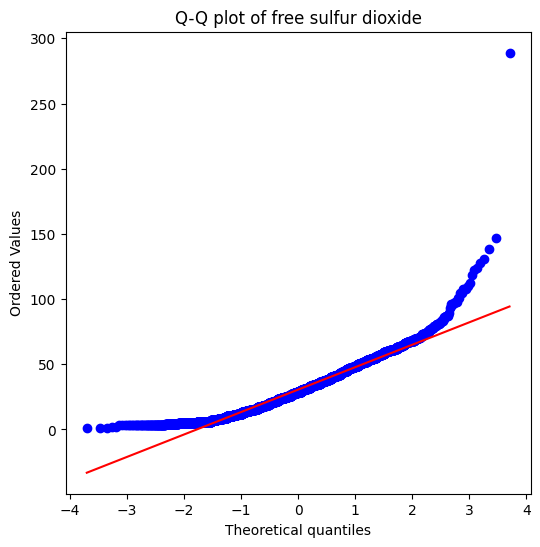

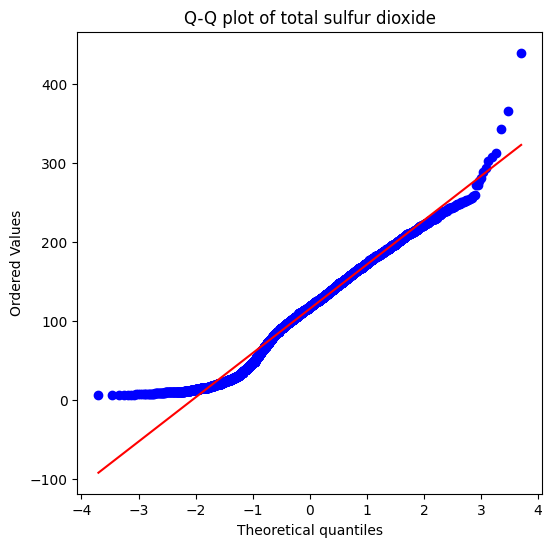

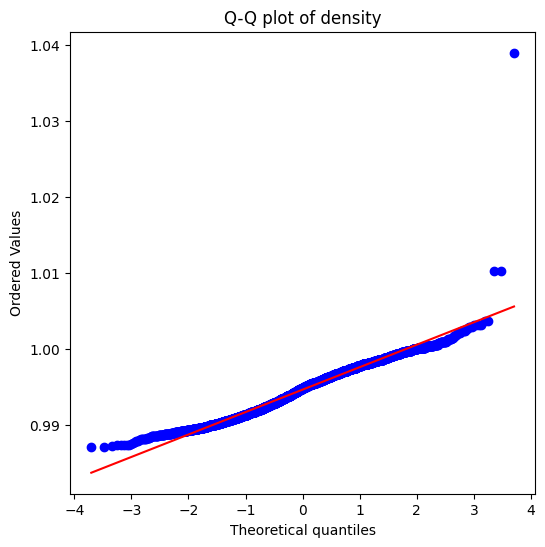

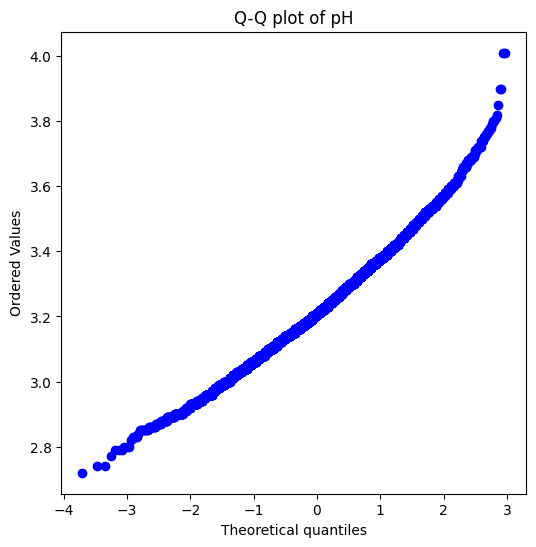

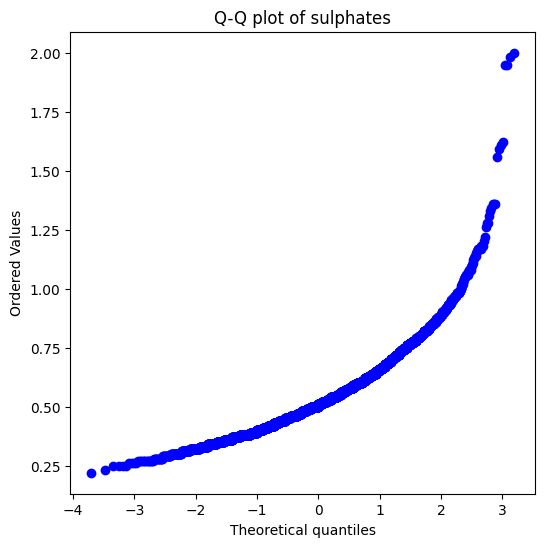

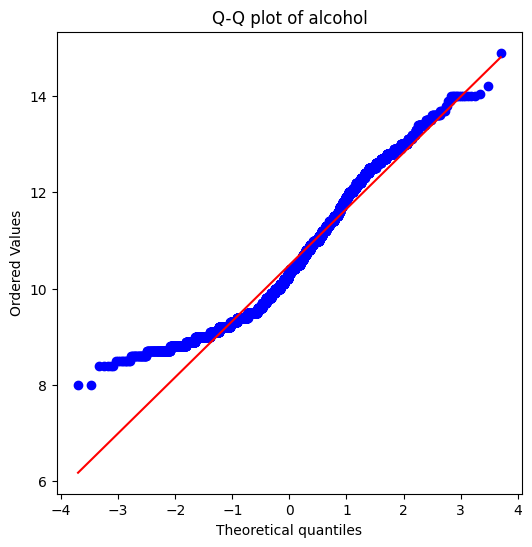

In [11]:
#qq plot for numerical features

for col in num_cols:  
    fig, ax = plt.subplots(figsize=(6,6))  
    stats.probplot(num_cols[col], dist='norm', plot=ax)  
    ax.set_title(f'Q-Q plot of {col}')
    plt.show()

By observing the qq plot we can analyze if the data follows the following data distribution or not we can see most of the data are not normally distributed

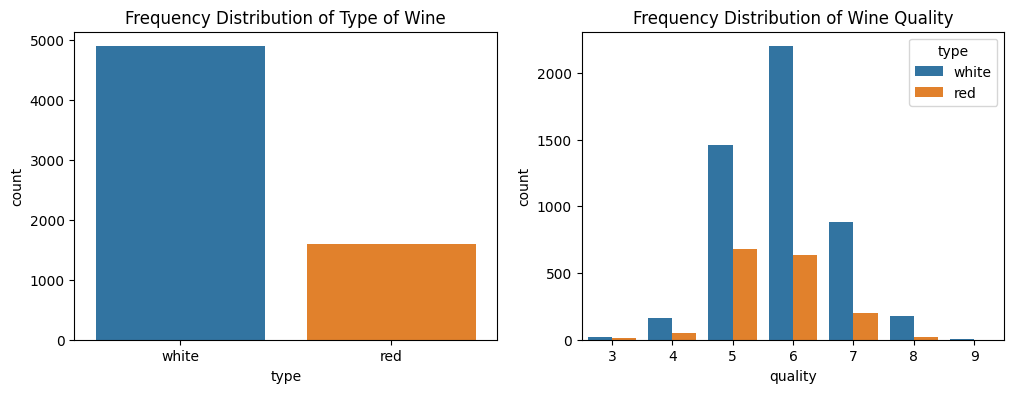

In [12]:
# freq distribution for categorical feature and target feature
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x=cat_col, ax=axs[0], hue=df['type'])
axs[0].set_title('Frequency Distribution of Type of Wine')
sns.countplot(x=target_col, ax=axs[1], hue=df['type'])
axs[1].set_title('Frequency Distribution of Wine Quality')
plt.show()

We can clearly see that data is not uniformly distributed so we may have to do sampling or use SMOTE Synthetic Minority Over-sampling Technique before passing the data to model.

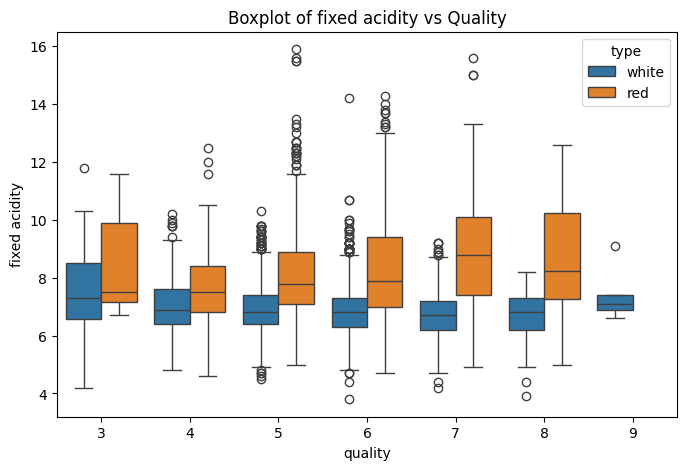

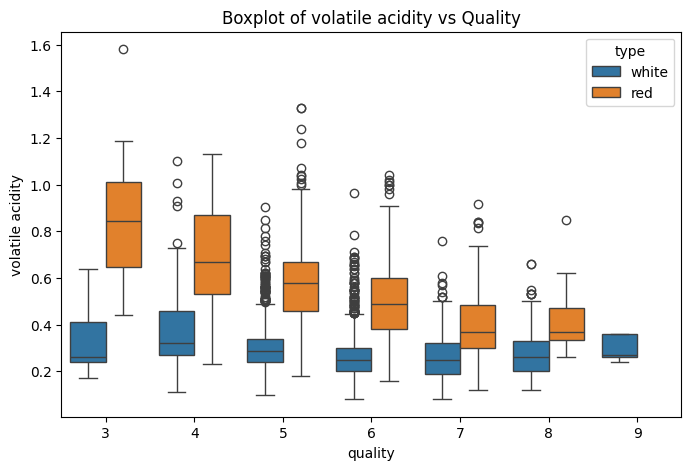

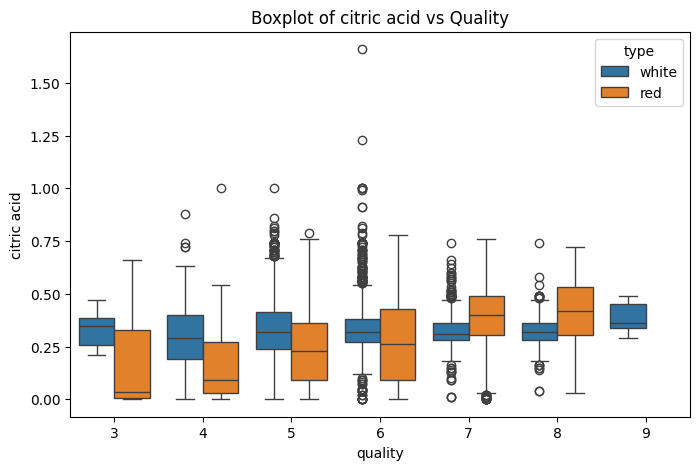

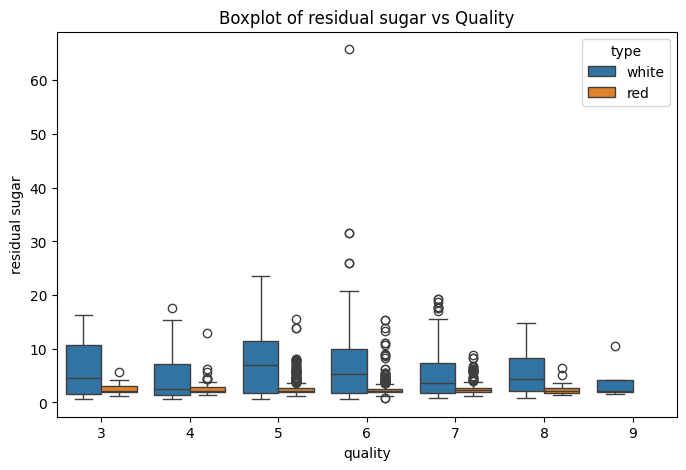

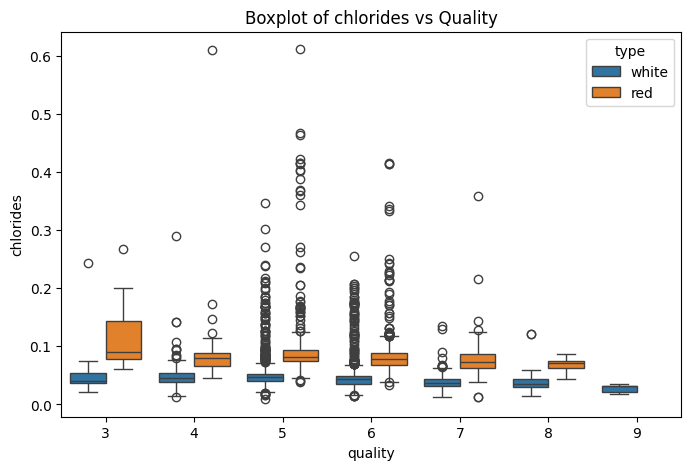

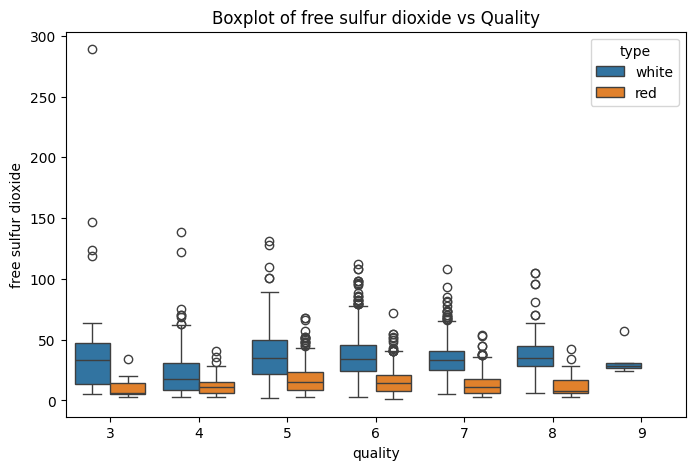

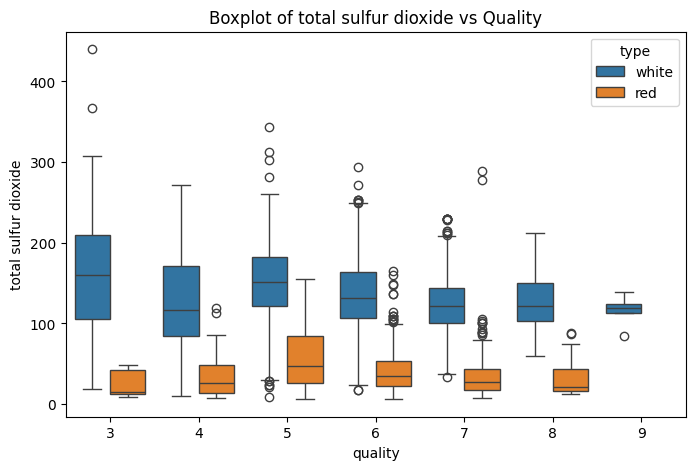

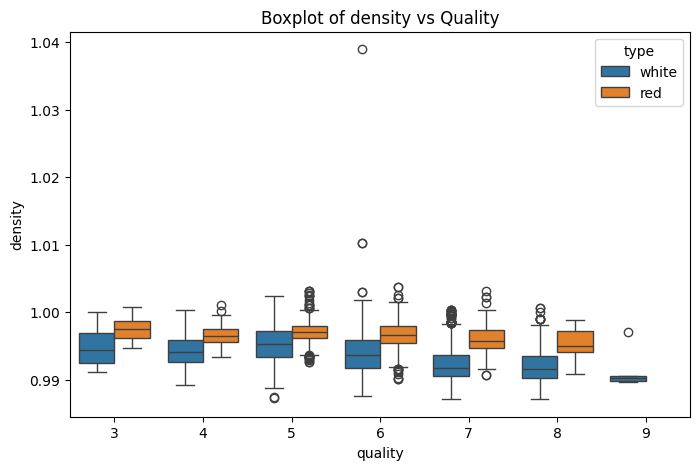

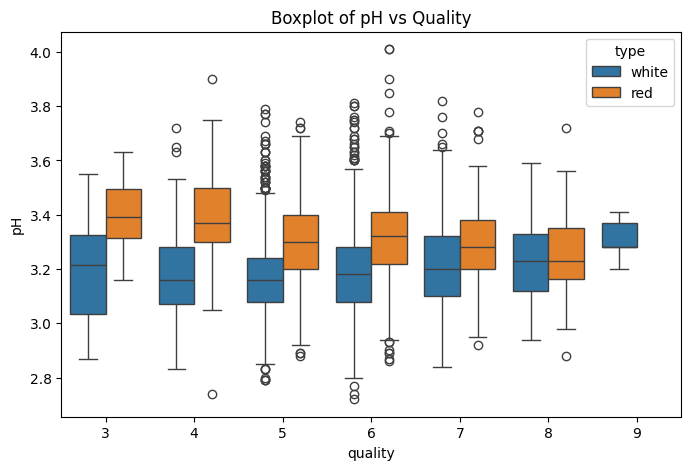

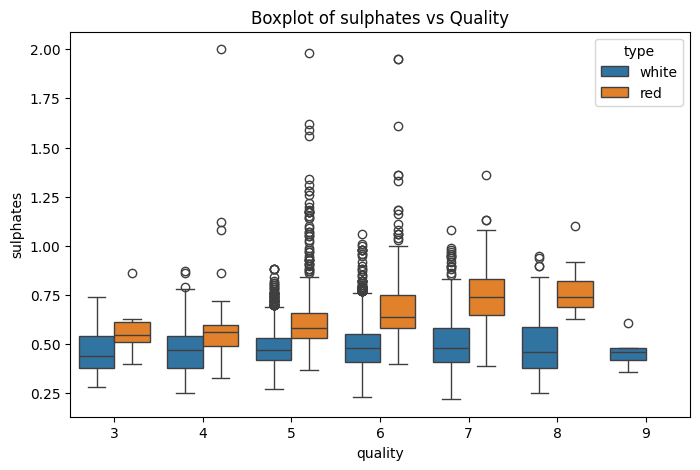

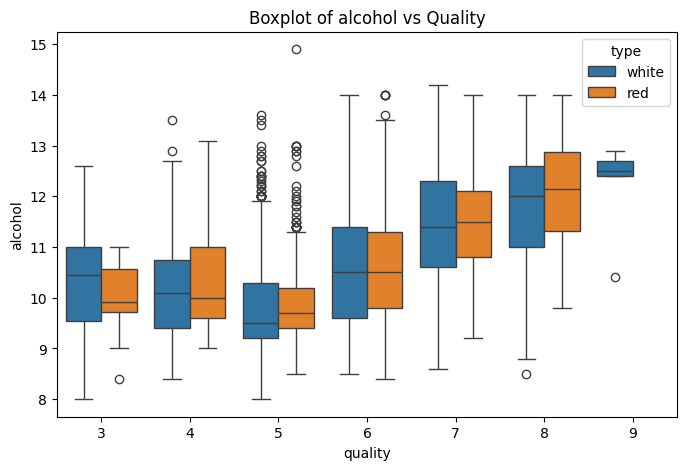

In [13]:
#bivariate analysis between numerical features and target feature
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=target_col, y=num_cols[col], hue=df['type'])
    plt.title(f'Boxplot of {col} vs Quality')
    plt.show()

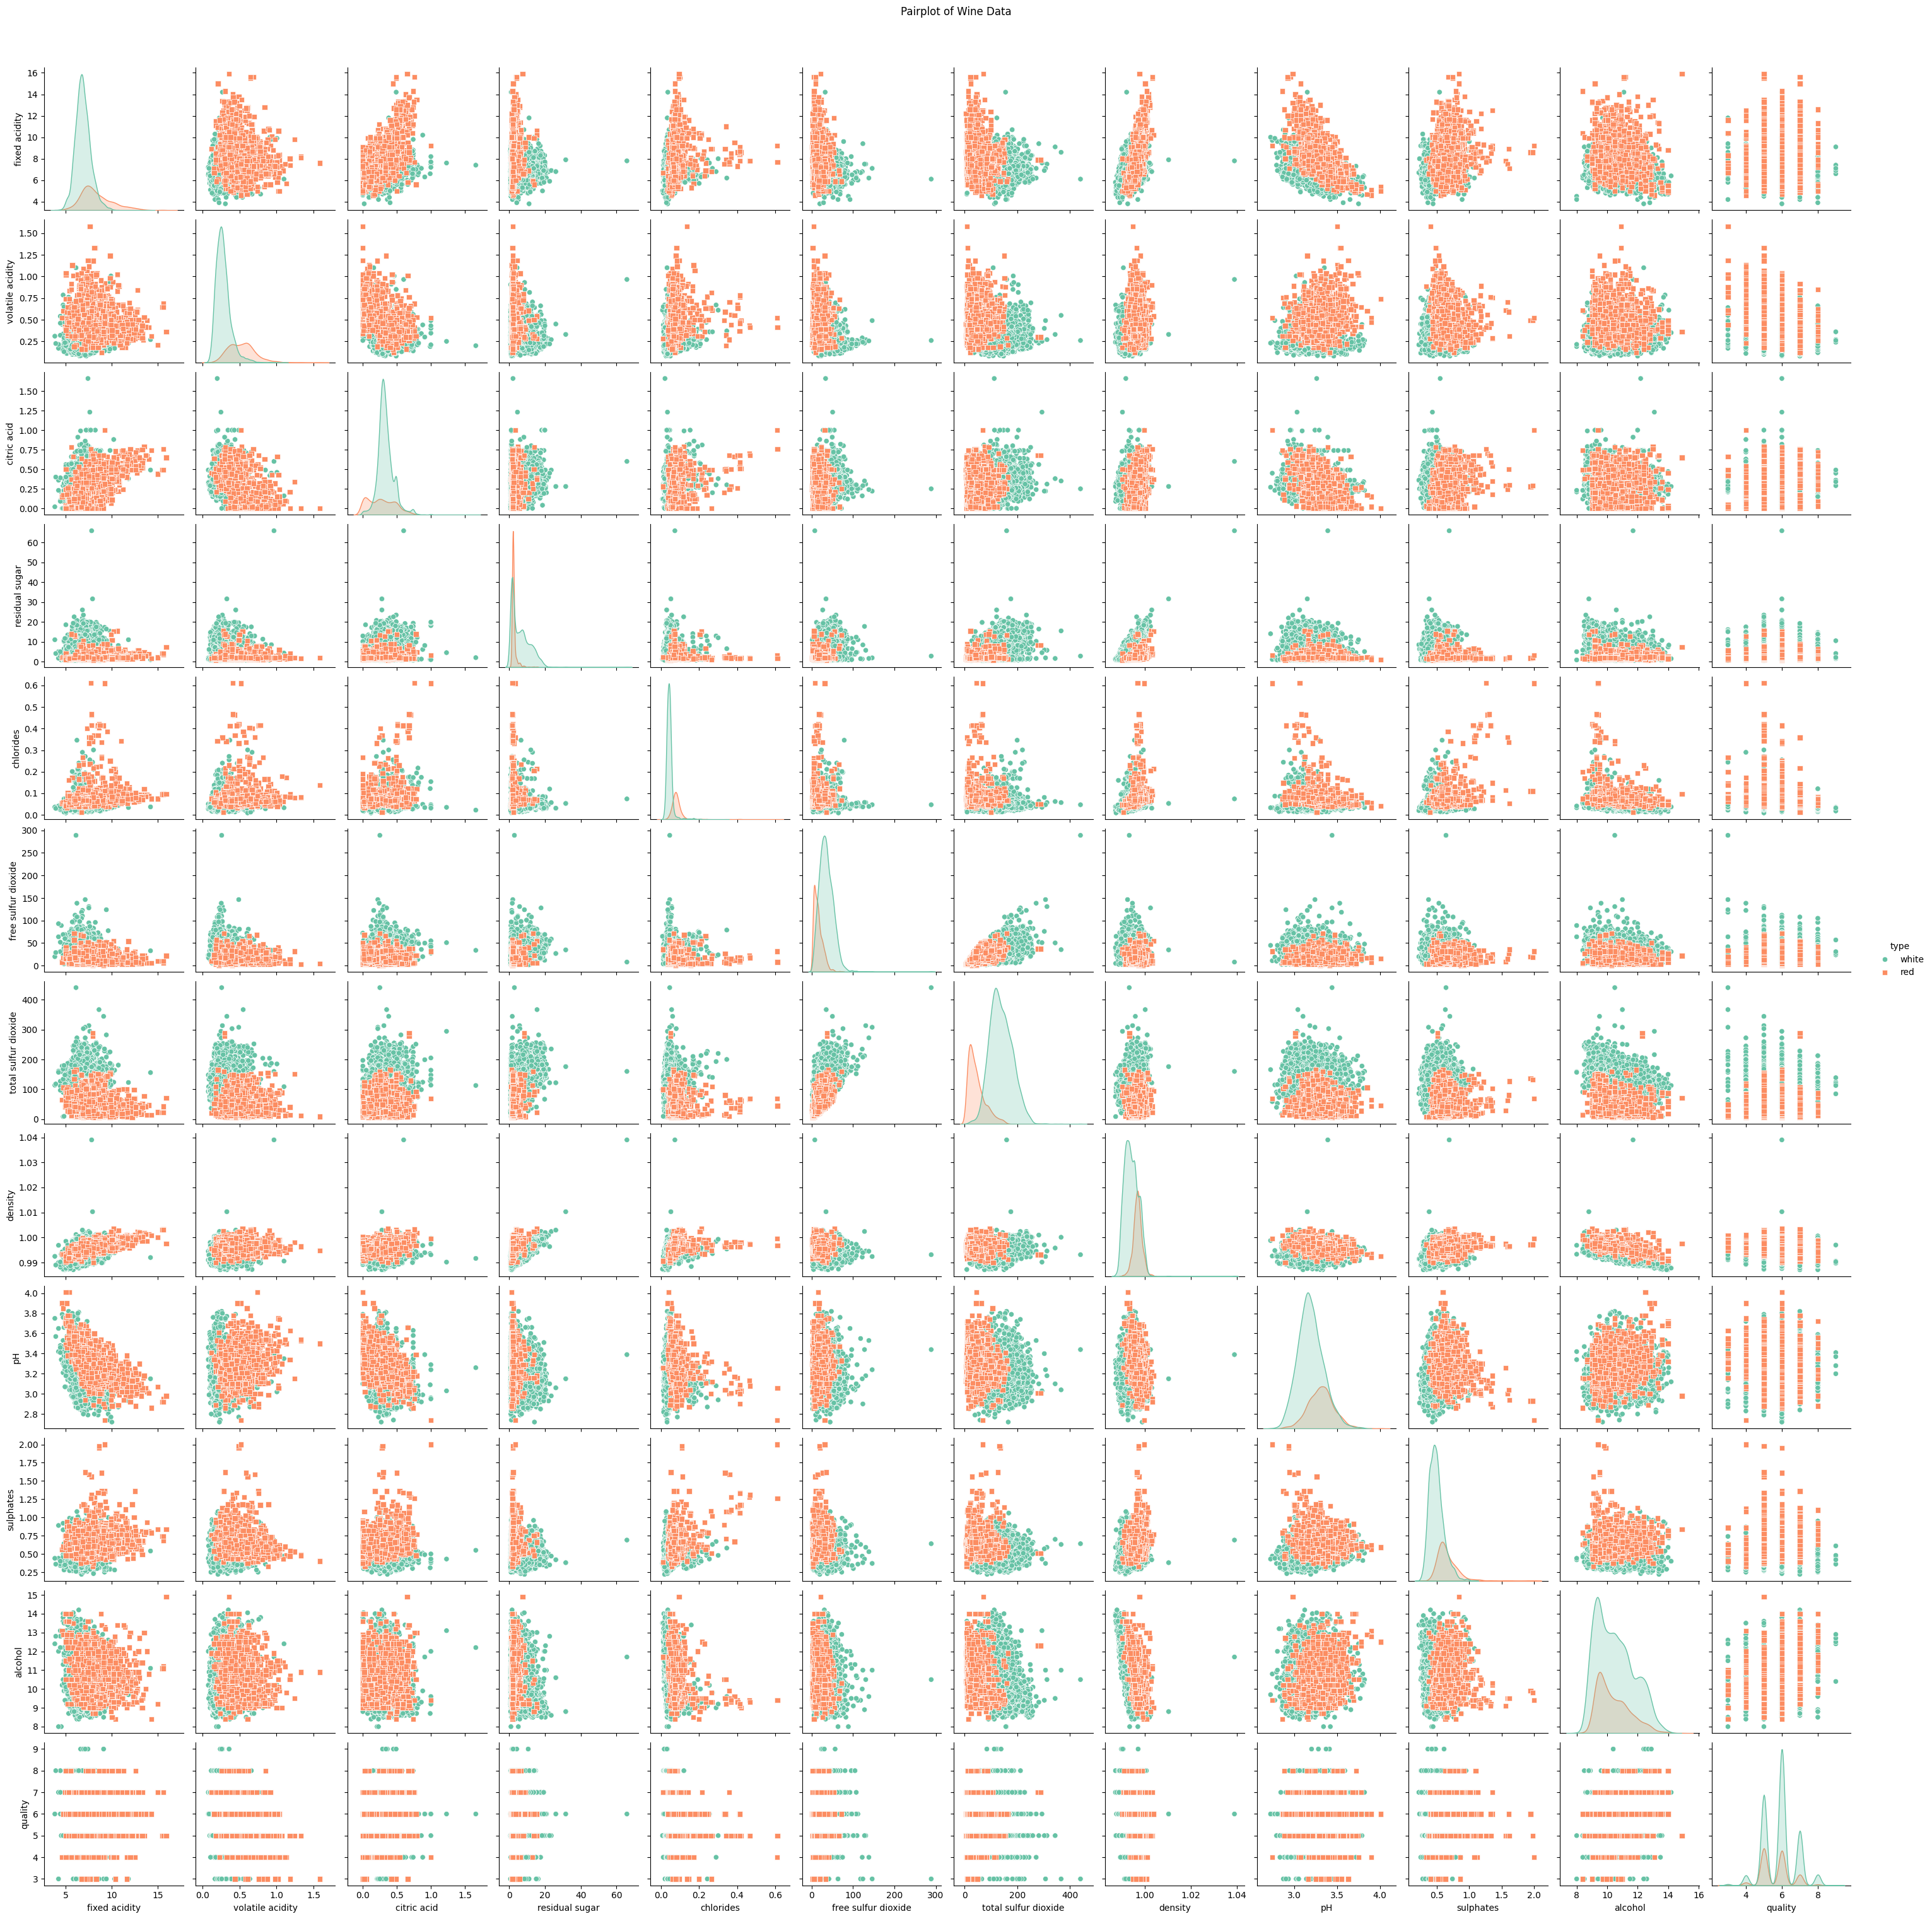

In [15]:

# Pairplot with KDE on the diagonal
sns.pairplot(df, hue='type', diag_kind='kde', markers=['o', 's'], palette='Set2')
plt.suptitle('Pairplot of Wine Data', y=1.02)
plt.show()

As this figure is to small to analysze we will analyze relation using corr matrix and heatmap
But we can draw scatter plot using sns.scatterplot(x,y) to analyze result for 2 features instead of pairplot which uses whole dataset


In [16]:
corr = df.drop(columns=['type']).corr()

In [17]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


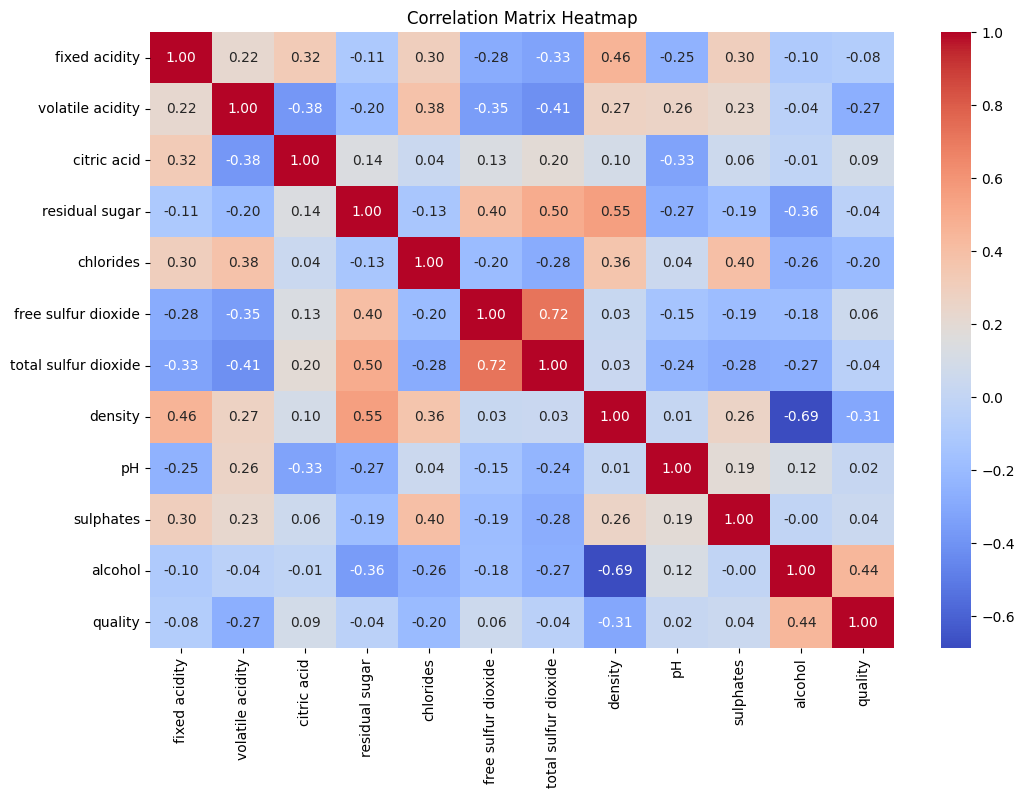

In [18]:
#heatmap of correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

So after analyzing the correlation matrix we can see some features are highly correlated such as:

Free sulfur dioxide & Total sulfur dioxide = 0.72 
Density & Alcohol 0.69
others are moderate and weak ranging between +-0.3 to +- 0.6

As our target feature is quality and it is highly correlated with alcohol so alchol is one of the most important feature for prediction